In [68]:
import sys
sys.path.append('..') # Add parent directory to path

import pandas as pd
import glob
import os
import pylab
import matplotlib.pyplot as plt

In [2]:
price_files = glob.glob(
    os.path.join('ds', "*_prices.csv")
)

price_data = pd.DataFrame()
for ind, file in enumerate(price_files):
    df = pd.read_csv(file)
    df["resort"] = os.path.basename(file).split("_")[0]
    price_data = pd.concat([price_data, df])

price_data["day"] = pd.to_datetime(price_data["date"]).apply(lambda x: x.date())
price_data.tail()

,date,price,fetch_timestamp,scrape_file,resort,day
67375,2024-04-07,61.0,2024-03-30 10:45:50.753235,adelboden_2024-03-30T10:45:50.753235.csv,adelboden,2024-04-07
67376,2024-04-07,61.0,2024-03-30 11:00:52.251340,adelboden_2024-03-30T11:00:52.251340.csv,adelboden,2024-04-07
67377,2024-04-07,61.0,2024-03-30 11:00:52.251340,adelboden_2024-03-30T11:00:52.251340.csv,adelboden,2024-04-07
67378,2024-04-07,61.0,2024-03-30 11:15:52.953049,adelboden_2024-03-30T11:15:52.953049.csv,adelboden,2024-04-07
67379,2024-04-07,61.0,2024-03-30 11:15:52.953049,adelboden_2024-03-30T11:15:52.953049.csv,adelboden,2024-04-07


In [79]:
augmented_files = glob.glob(
    os.path.join('ds', "*_augmented.csv")
)

aug_data = {}
for ind, file in enumerate(price_files):
    df = pd.read_csv(file)
    length = len(df)
    df = df.drop_duplicates()
    resort = os.path.basename(file).split("_")[0]
    print(f"{resort}: dropped {length - len(df)} duplicates in {resort} and has now {len(df)} entries")
    df.index = pd.DatetimeIndex(df["fetch_timestamp"])
    aug_data[resort] = df

#aug_data["day"] = pd.to_datetime(aug_data["date"]).apply(lambda x: x.date())

laax: dropped 0 duplicates in laax and has now 66405 entries
scuol: dropped 2881 duplicates in scuol and has now 87517 entries
gstaad: dropped 0 duplicates in gstaad and has now 68526 entries
pizol: dropped 0 duplicates in pizol and has now 76537 entries
adelboden: dropped 14721 duplicates in adelboden and has now 52659 entries


laax: resampled from 66405 to 1375
scuol: resampled from 87517 to 1855
gstaad: resampled from 68526 to 1435
pizol: resampled from 76537 to 1589
adelboden: resampled from 52659 to 1211


/tmp/ipykernel_226563/1742619775.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


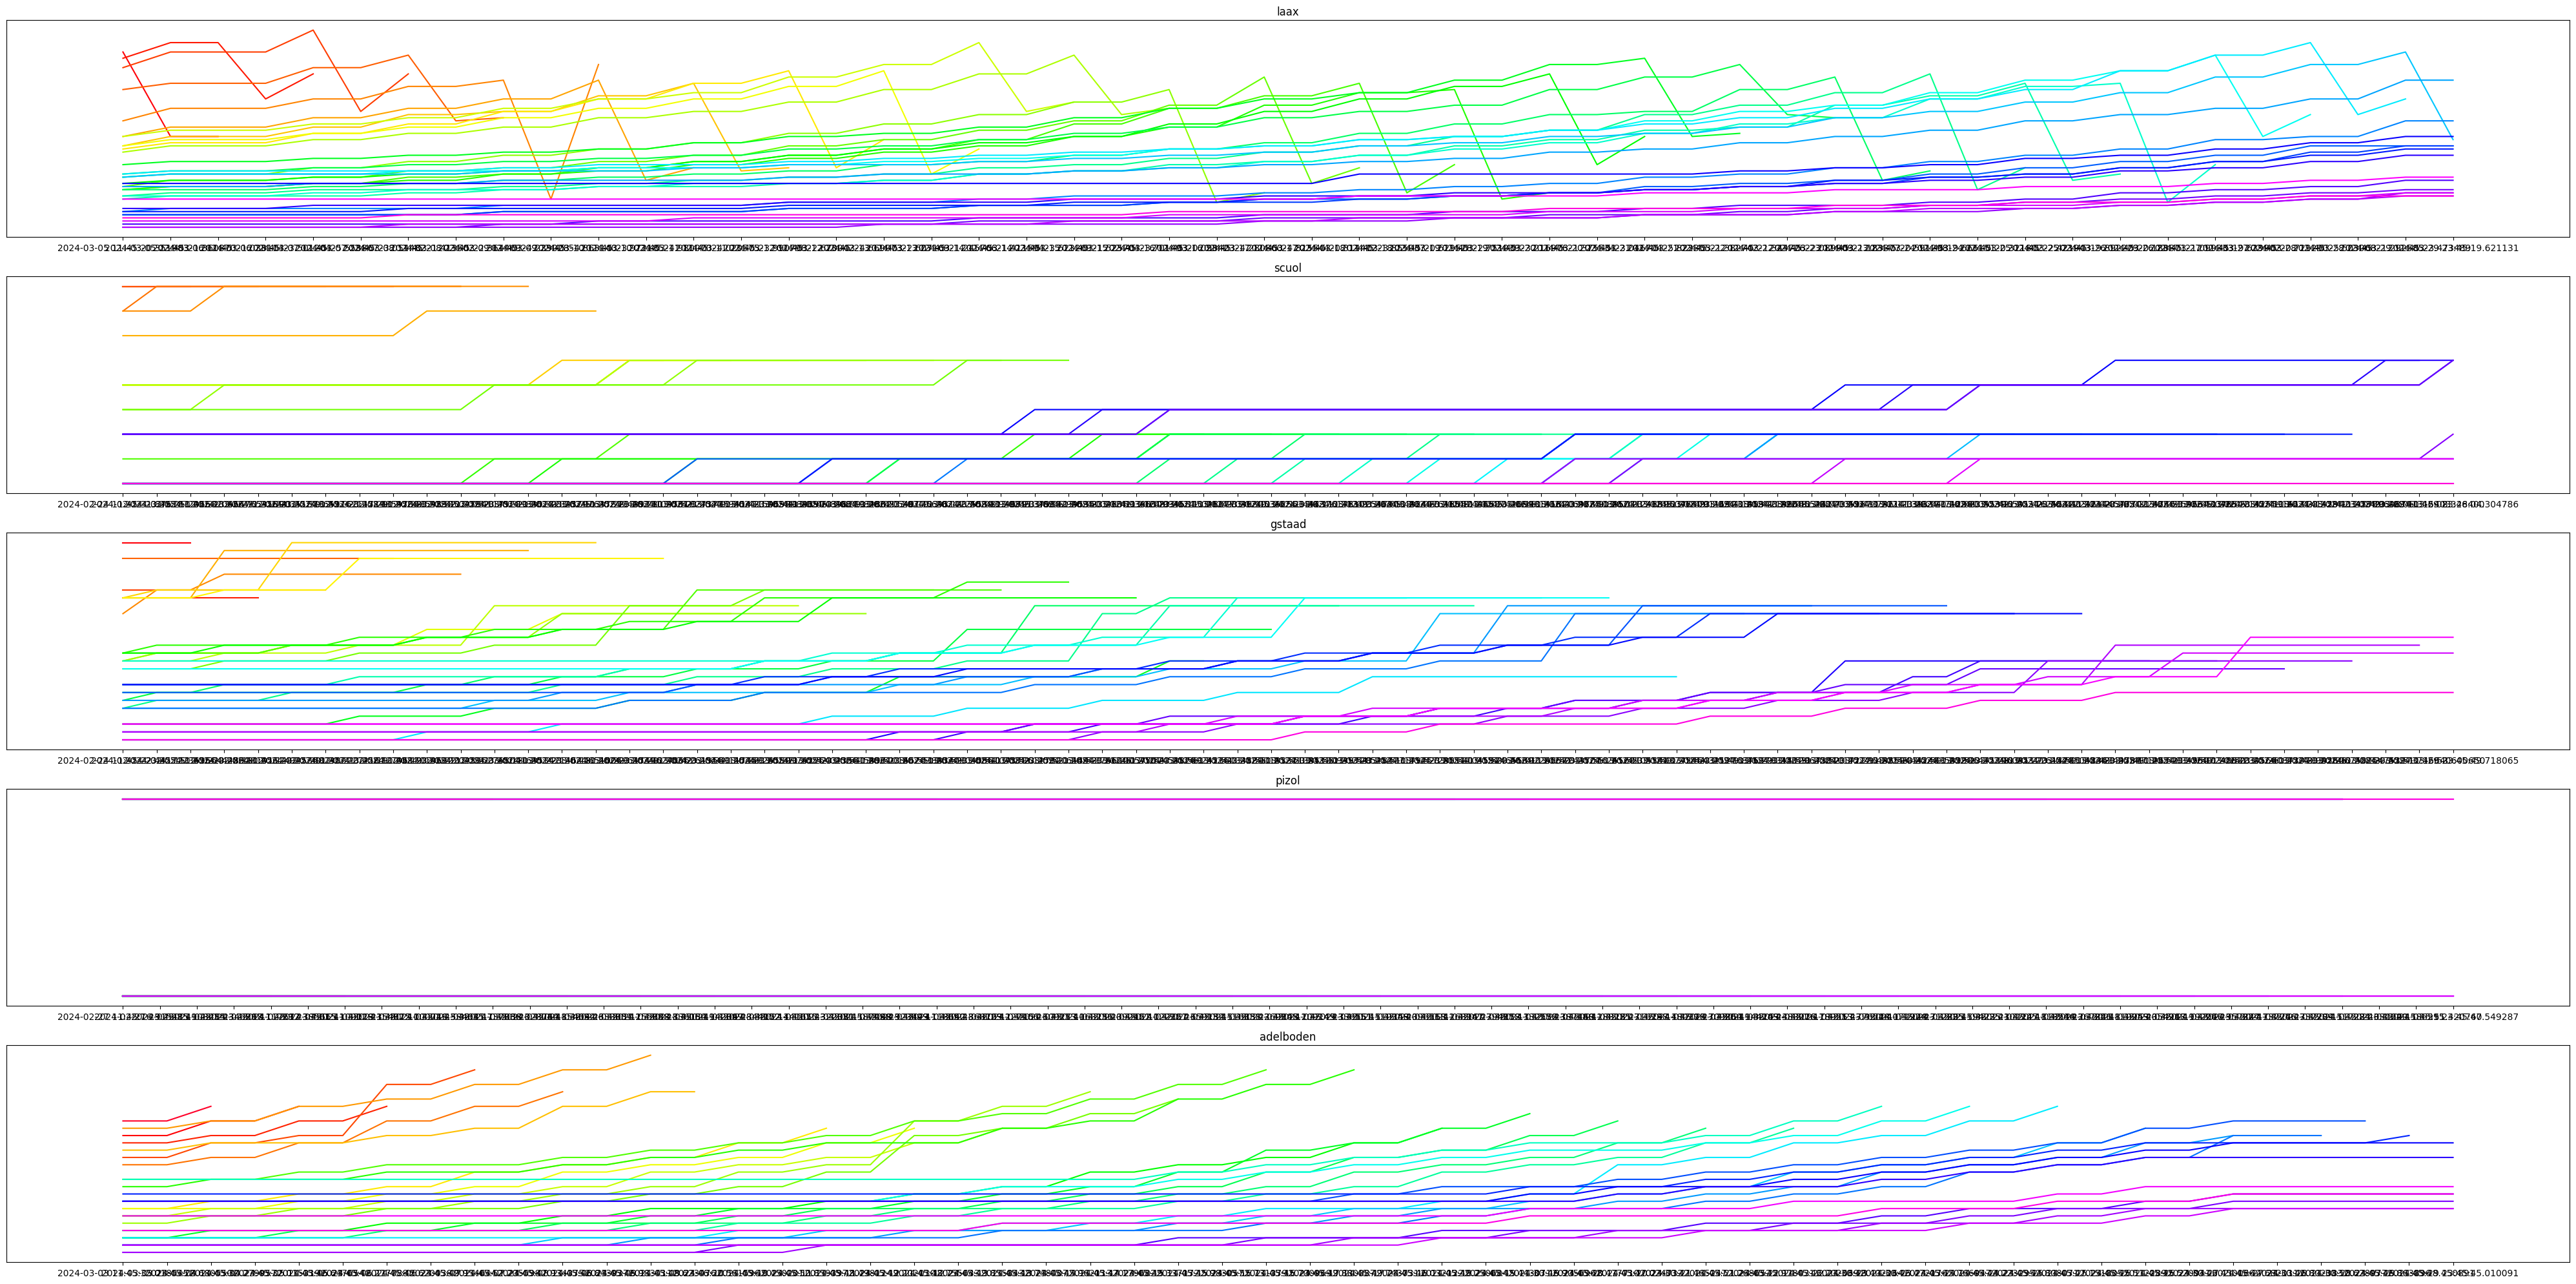

In [85]:
cm = pylab.get_cmap('gist_rainbow')

res_data = {}
for resort in aug_data:
    res_data[resort] = (
        aug_data[resort]
        .groupby(['date'])
        .apply(
            lambda x: x.resample('12h').ffill(),
            include_groups=False
        )
        .dropna()
        .groupby(["date"])
    )


fig = plt.figure(figsize=(40, 20))
for index, resort in enumerate(res_data):
    print(f"{resort}: resampled from {len(aug_data[resort])} to {sum(res_data[resort].size())}")
    axis = fig.add_subplot(
        5,1,index+1,
        yticks=[],
        title=resort
    )
    for index, (date, item) in enumerate(res_data[resort]):
        color = cm(1.0 * index / len(res_data[resort]))
        axis.plot(item['fetch_timestamp'], item["price"], color=color)
        

fig.tight_layout()
fig.show()